Sources:
- https://gist.github.com/astrojuanlu/2689795
- Continuum Mechanics for engineers, Maze & Maze second edition 1998

# Index notation in continuum mechanics

Prof the definition of the cross product with Levi-Civita:

$$
\mathbf{a} \times \mathbf{b} = \epsilon_{ijk} a_j b_k \hat{\mathbf{i}}
$$

In [3]:
from IPython.display import Image
from sympy import LeviCivita, symbols
import numpy as np

# Define the Levi-Civita symbol using NumPy and list comprehension
eps = np.array([[[float(LeviCivita(i, j, k)) for k in range(3)] for j in range(3)] for i in range(3)])
print("Levi-Civita symbol:")
print(eps)

# Define the vectors A and B
A = np.array([1, 2, 3])
B = np.array([4, -5, 6])

# Calculate the cross product using the Levi-Civita symbol
cross_product = np.array([sum(eps[i, j, k] * A[j] * B[k] for j in range(3) for k in range(3)) for i in range(3)])

# Print the result
print("Cross product of A and B:")
print(cross_product)

Levi-Civita symbol:
[[[ 0.  0.  0.]
  [ 0.  0.  1.]
  [ 0. -1.  0.]]

 [[ 0.  0. -1.]
  [ 0.  0.  0.]
  [ 1.  0.  0.]]

 [[ 0.  1.  0.]
  [-1.  0.  0.]
  [ 0.  0.  0.]]]
Cross product of A and B:
[ 27.   6. -13.]


In [1]:
# Define the Levi-Civita symbol using NumPy list comprehension
eps = np.array([[[float(LeviCivita(i, j, k)) for k in range(3)] for j in range(3)] for i in range(3)])

# Define the components of the vectors A and B
A1, A2, A3 = symbols('A1 A2 A3')
B1, B2, B3 = symbols('B1 B2 B3')

A = np.array([A1, A2, A3])
B = np.array([B1, B2, B3])

# Calculate the cross product using the Levi-Civita symbol
cross_product = np.array([
    sum(eps[i, j, k] * A[j] * B[k] for j in range(3) for k in range(3))
    for i in range(3)
])

# Print the cross product
print(cross_product)

[1.0*A2*B3 - 1.0*A3*B2 -1.0*A1*B3 + 1.0*A3*B1 1.0*A1*B2 - 1.0*A2*B1]


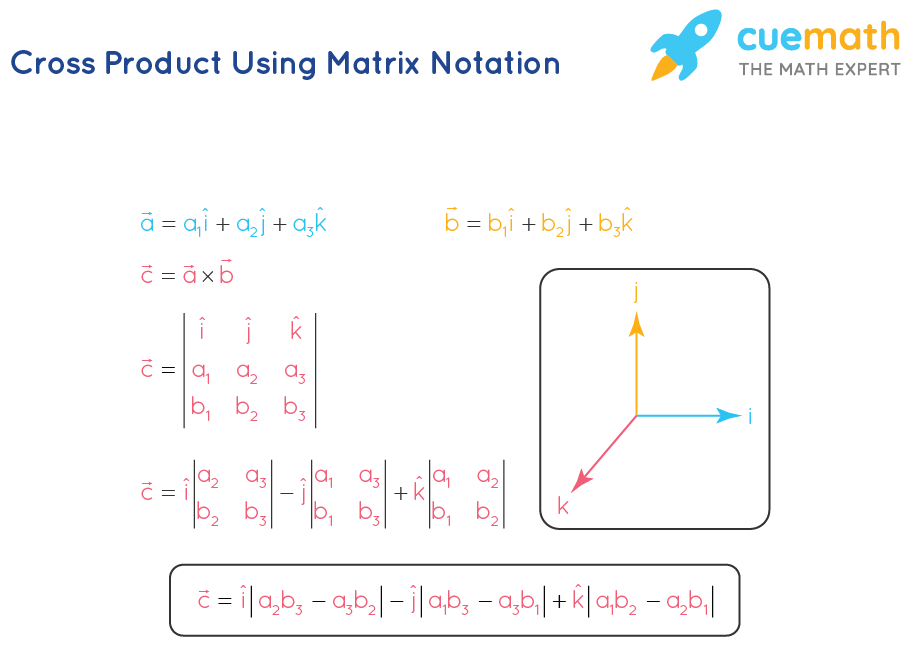

In [4]:
# Compare the above result with 
Image("images/cross-product.png")

Prove one of the $\epsilon-\delta$ identities: 
$$
\epsilon_{m i q}\epsilon_{j k q}=\delta_{mj}\delta_{i k}-\delta_{m k}\delta_{i j}
$$

In [13]:
from sympy import LeviCivita, symbols
import numpy as np

# Define the Levi-Civita symbol using NumPy list comprehension
eps = np.array([[[float(LeviCivita(i, j, k)) for k in range(3)] for j in range(3)] for i in range(3)])

# Define the Kronecker delta function
def delta(i, j):
    return 1.0 if i == j else 0.0

# Calculate the left-hand side of the identity
lhs = np.array([[[sum(eps[m, i, q] * eps[j, k, q] for q in range(3)) for k in range(3)] for j in range(3)] for m in range(3) for i in range(3)])
originalShapeLHS = lhs.copy()
lhs = lhs.reshape((3, 3, 3, 3))  # Reshape to 4D array

# Calculate the right-hand side of the identity
rhs = np.array([[[delta(m, j) * delta(i, k) - delta(m, k) * delta(i, j) for k in range(3)] for j in range(3)] for m in range(3) for i in range(3)])
originalShapeRHS = rhs.copy()
rhs = rhs.reshape((3, 3, 3, 3))  # Reshape to 4D array

# Check if both sides are equal
are_equal = np.allclose(lhs, rhs)

# Print the results
print("LHS:")
print(lhs)
print("\nRHS:")
print(rhs)
print("\nAre both sides equal?")
print(are_equal)


LHS:
[[[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  1.  0.]
   [-1.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  1.]
   [ 0.  0.  0.]
   [-1.  0.  0.]]]


 [[[ 0. -1.  0.]
   [ 1.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  1.]
   [ 0. -1.  0.]]]


 [[[ 0.  0. -1.]
   [ 0.  0.  0.]
   [ 1.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0. -1.]
   [ 0.  1.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]]

RHS:
[[[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  1.  0.]
   [-1.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  1.]
   [ 0.  0.  0.]
   [-1.  0.  0.]]]


 [[[ 0. -1.  0.]
   [ 1.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  1.]
   [ 0. -1.  0.]]]


 [[[ 0.  0. -1.]
   [ 0.  0.  0.]
   [ 1.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0. -1.]
   [ 0.  1.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]]

Are both sides equal?
Tr